# Project -- Analysing Football dataset from Kaggle

Aim : I have been trying to do a project where I can showcase my SQL and exploratory data analaysis(EDA) skills. I took this project inspiration from Kaggle (Data analysis using SQL). 

I connected to the data, cleaned and derived specific fields using SQL and visualized the data to answer the following questions:
1. Players that received most penalities
2. correlation between age and other attributes

In [454]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

path = "/Users/navyasree/Downloads/database.sqlite"

print(path)


/Users/navyasree/Downloads/database.sqlite


# Dataset table Information

In [455]:
#establishing the connection using sqlite3.connect and loading data into tables to display available table info.
conn = sqlite3.connect(path)

tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", conn)
tables
                        
       

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...
8,table,status,status,305672,"CREATE TABLE ""status"" (\n""level_0"" INTEGER,\n ..."


In [456]:
#viewing Player table fields and data
player_table = pd.read_sql("select * from Player;",conn)
player_table

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [457]:
#viewing player_attributes table
player_attributes = pd.read_sql("select * from player_attributes;",conn)
player_attributes.shape
player_attributes.columns
player_attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [458]:
for rows,columns in enumerate(player_attributes):
    print(rows,columns)

0 id
1 player_fifa_api_id
2 player_api_id
3 date
4 overall_rating
5 potential
6 preferred_foot
7 attacking_work_rate
8 defensive_work_rate
9 crossing
10 finishing
11 heading_accuracy
12 short_passing
13 volleys
14 dribbling
15 curve
16 free_kick_accuracy
17 long_passing
18 ball_control
19 acceleration
20 sprint_speed
21 agility
22 reactions
23 balance
24 shot_power
25 jumping
26 stamina
27 strength
28 long_shots
29 aggression
30 interceptions
31 positioning
32 vision
33 penalties
34 marking
35 standing_tackle
36 sliding_tackle
37 gk_diving
38 gk_handling
39 gk_kicking
40 gk_positioning
41 gk_reflexes


In [459]:
#joining player and player_attributes on player_fifa_api_id
player_df = pd.read_sql("""SELECT 
    a.player_name,
    pa.*
FROM Player a
JOIN player_attributes pa 
ON a.player_fifa_api_id = pa.player_fifa_api_id;
""",conn )
player_df.shape


(183929, 43)

In [460]:
team = pd.read_sql("select * from team",conn)
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [461]:
for rows,columns in enumerate(team):
    print(rows,columns)

0 id
1 team_api_id
2 team_fifa_api_id
3 team_long_name
4 team_short_name


In [462]:
country = pd.read_sql("select * from country",conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [463]:
leagues = pd.read_sql("select * from league",conn)
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [464]:
#countries and their leagues

leagues = pd.read_sql("select * from league join country on country.id = league.country_id", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [465]:
#number of teams
teams = pd.read_sql("select * from team",conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [466]:
teams = pd.read_sql("select * from team order by team_long_name limit 10",conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [467]:
match = pd.read_sql("select * from match",conn)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [468]:
for r,c in enumerate(match):
    print(r,c)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

# List of Detailed Matches for KRC Genk team

In [469]:
#match,country,league,team
detailed_matches = pd.read_sql("""select match.id,
                                         country.name as country_name,
                                         league.name as league_name,
                                         season,
                                         stage,
                                         HT.team_long_name AS  home_team,
                                         AT.team_long_name AS away_team,
                                         home_team_goal, 
                                         away_team_goal
                                         from match
                                         join country on country.id = match.country_id
                                         join league on league.id = match.league_id
                                         left join team as ht on ht.team_api_id = match.home_team_api_id
                                         left join team as at on at.team_api_id = match.away_team_api_id
                                         where home_team = "KRC Genk"
                                         order by match.id
                                         limit 10;""",conn)
detailed_matches

,id,country_name,league_name,season,stage,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,KRC Genk,Beerschot AC,1,1
1,29,Belgium,Belgium Jupiler League,2008/2009,12,KRC Genk,KSV Roeselare,1,1
2,47,Belgium,Belgium Jupiler League,2008/2009,14,KRC Genk,KSV Cercle Brugge,3,2
3,65,Belgium,Belgium Jupiler League,2008/2009,16,KRC Genk,Sporting Charleroi,1,0
4,94,Belgium,Belgium Jupiler League,2008/2009,19,KRC Genk,RAEC Mons,2,0
5,121,Belgium,Belgium Jupiler League,2008/2009,21,KRC Genk,SV Zulte-Waregem,1,2
6,143,Belgium,Belgium Jupiler League,2008/2009,23,KRC Genk,Royal Excel Mouscron,1,1
7,158,Belgium,Belgium Jupiler League,2008/2009,25,KRC Genk,FCV Dender EH,4,3
8,179,Belgium,Belgium Jupiler League,2008/2009,27,KRC Genk,Tubize,3,0
9,188,Belgium,Belgium Jupiler League,2008/2009,28,KRC Genk,KVC Westerlo,1,4


In [470]:
home_team = pd.read_sql("""select distinct  HT.team_long_name AS  home_team from match join team as ht on
                            ht.team_api_id = match.home_team_api_id 
                        """,conn)
home_team

,home_team
0,KRC Genk
1,SV Zulte-Waregem
2,KSV Cercle Brugge
3,KAA Gent
4,FCV Dender EH
...,...
291,FC St. Gallen
292,FC Thun
293,Servette FC
294,FC Lausanne-Sports


# Total Number of Leagues Per Season

In [471]:
#total number of leagues per season
leagues_per_season = pd.read_sql("""select country.name as country_name,
                                           league.name as league_name,
                                           season,
                                           count(distinct ht.team_long_name) as number_of_teams,
                                           count(distinct stage) as number_of_stages,
                                           avg(home_team_goal) as avg_home_team_goal_scores,
                                           avg(away_team_goal) as avg_away_team_goals,
                                           avg(home_team_goal - away_team_goal) as avg_goal_diff,
                                           avg(home_team_goal + away_team_goal) as avg_goals,
                                           sum(home_team_goal + away_team_goal) as total_goals
                                           from match
                                           join country on country.id = match.country_id
                                           join league on league.id = match.league_id
                                           left join team as ht on ht.team_api_id = match.home_team_api_id
                                           left join team as at on at.team_api_id = match.away_team_api_id
                                           group by country.name, league.name, season""",conn)
leagues_per_season.head(10)

,country_name,league_name,season,number_of_teams,number_of_stages,avg_home_team_goal_scores,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
0,Belgium,Belgium Jupiler League,2008/2009,18,34,1.630719,1.163399,0.467320,2.794118,855
1,Belgium,Belgium Jupiler League,2009/2010,15,30,1.466667,1.223810,0.242857,2.690476,565
2,Belgium,Belgium Jupiler League,2010/2011,16,30,1.591667,1.054167,0.537500,2.645833,635
3,Belgium,Belgium Jupiler League,2011/2012,16,30,1.754167,1.125000,0.629167,2.879167,691
4,Belgium,Belgium Jupiler League,2012/2013,16,30,1.562500,1.366667,0.195833,2.929167,703
5,Belgium,Belgium Jupiler League,2013/2014,4,6,1.500000,1.000000,0.500000,2.500000,30
6,Belgium,Belgium Jupiler League,2014/2015,16,30,1.566667,1.216667,0.350000,2.783333,668
7,Belgium,Belgium Jupiler League,2015/2016,16,30,1.675000,1.216667,0.458333,2.891667,694
8,England,England Premier League,2008/2009,20,38,1.400000,1.078947,0.321053,2.478947,942
9,England,England Premier League,2009/2010,20,38,1.697368,1.073684,0.623684,2.771053,1053


In [472]:
no_of_countries = pd.read_sql("select distinct name from country",conn)
no_of_countries

,name
0,Belgium
1,England
2,France
3,Germany
4,Italy
5,Netherlands
6,Poland
7,Portugal
8,Scotland
9,Spain


# Number of leagues by Belgium,France,Italy, England and Spain

In [473]:
#total number of leagues per season for belgium, france, italy, england, spain
leagues_per_season = pd.read_sql("""select (country.name) as country_name,
                                           league.name as league_name,
                                           season,
                                           count(country.name) as distinct_count,
                                           count(distinct ht.team_long_name) as number_of_teams,
                                           count(distinct stage) as number_of_stages,
                                           avg(home_team_goal) as avg_home_team_goal_scores,
                                           avg(away_team_goal) as avg_away_team_goals,
                                           avg(home_team_goal - away_team_goal) as avg_goal_diff,
                                           avg(home_team_goal + away_team_goal) as avg_goals,
                                           sum(home_team_goal + away_team_goal) as total_goals
                                           from match
                                           join country on country.id = match.country_id
                                           join league on league.id = match.league_id
                                           left join team as ht on ht.team_api_id = match.home_team_api_id
                                           left join team as at on at.team_api_id = match.away_team_api_id
                                           where country_name in ("Belgium","France","Italy","England","Spain")
                                           group by country.name, league.name, season
                                           having count(distinct stage) >10
                                           order by country.name, league.name, season DESC""",conn)
leagues_per_season.head(10)


,country_name,league_name,season,distinct_count,number_of_teams,number_of_stages,avg_home_team_goal_scores,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
0,Belgium,Belgium Jupiler League,2015/2016,240,16,30,1.675000,1.216667,0.458333,2.891667,694
1,Belgium,Belgium Jupiler League,2014/2015,240,16,30,1.566667,1.216667,0.350000,2.783333,668
2,Belgium,Belgium Jupiler League,2012/2013,240,16,30,1.562500,1.366667,0.195833,2.929167,703
3,Belgium,Belgium Jupiler League,2011/2012,240,16,30,1.754167,1.125000,0.629167,2.879167,691
4,Belgium,Belgium Jupiler League,2010/2011,240,16,30,1.591667,1.054167,0.537500,2.645833,635
5,Belgium,Belgium Jupiler League,2009/2010,210,15,30,1.466667,1.223810,0.242857,2.690476,565
6,Belgium,Belgium Jupiler League,2008/2009,306,18,34,1.630719,1.163399,0.467320,2.794118,855
7,England,England Premier League,2015/2016,380,20,38,1.492105,1.207895,0.284211,2.700000,1026
8,England,England Premier League,2014/2015,380,20,38,1.473684,1.092105,0.381579,2.565789,975
9,England,England Premier League,2013/2014,380,20,38,1.573684,1.194737,0.378947,2.768421,1052


In [474]:
list(leagues_per_season.columns.values)

['country_name',
 'league_name',
 'season',
 'distinct_count',
 'number_of_teams',
 'number_of_stages',
 'avg_home_team_goal_scores',
 'avg_away_team_goals',
 'avg_goal_diff',
 'avg_goals',
 'total_goals']

# Average Goals Per game

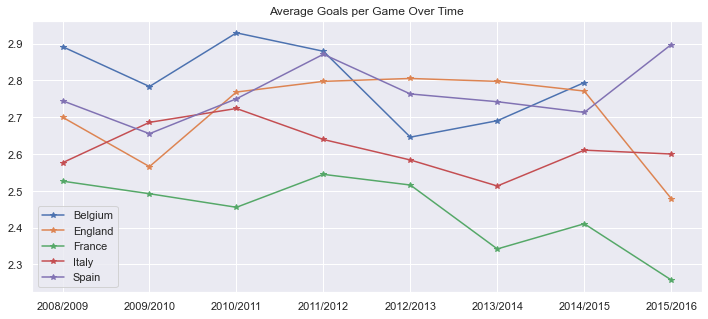

In [475]:
#Avg goals per game over time
df = pd.DataFrame(index=np.sort(leagues_per_season['season'].unique()), columns=leagues_per_season['country_name'].unique())
#print(df)
df.loc[:7,'Belgium'] = list(leagues_per_season.loc[leagues_per_season['country_name']=='Belgium','avg_goals'])#7 since belgium has only 7 rows of data- we are trying to match it with other countries
df.loc[:,'Spain']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time',grid = True,marker = '*')

# Average Home team Goal Scores

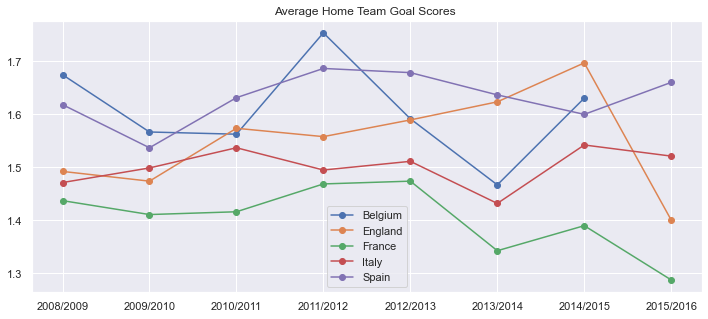

In [476]:
df = pd.DataFrame(index=np.sort(leagues_per_season['season'].unique()), columns=leagues_per_season['country_name'].unique())

df.loc[:7,'Belgium'] = list(leagues_per_season.loc[leagues_per_season['country_name']=='Belgium','avg_home_team_goal_scores'])
#7 since belgium has only 7 rows of data- we are trying to match it with other countries
df.loc[:,'Spain']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='Spain','avg_home_team_goal_scores'])
df.loc[:,'France']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='France','avg_home_team_goal_scores'])
df.loc[:,'Italy']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='Italy','avg_home_team_goal_scores'])
df.loc[:,'England']   = list(leagues_per_season.loc[leagues_per_season['country_name']=='England','avg_home_team_goal_scores'])

df.plot(figsize=(12,5),grid = True, marker = 'o',label='avg_home_team_goal_scores',title='Average Home Team Goal Scores ')

    

In [477]:
player_info = pd.read_sql("select * from player",conn)
player_info.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [478]:
player_info.head(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [479]:
player_df.head(2)

,player_name,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [480]:
player_df.drop(['id'],axis=1,inplace= True)
player_df

,player_name,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,Aaron Appindangoye,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,Aaron Appindangoye,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,Zvjezdan Misimovic,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183925,Zvjezdan Misimovic,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183926,Zvjezdan Misimovic,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183927,Zvjezdan Misimovic,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [481]:
#extracted year column from date using pd.to_datetime
player_df.date = pd.to_datetime(player_df.date)
player_df['year'] = player_df.date.dt.year
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183929 entries, 0 to 183928
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_name          183929 non-null  object        
 1   player_fifa_api_id   183929 non-null  int64         
 2   player_api_id        183929 non-null  int64         
 3   date                 183929 non-null  datetime64[ns]
 4   overall_rating       183142 non-null  float64       
 5   potential            183142 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183142 non-null  float64       
 10  finishing            183142 non-null  float64       
 11  heading_accuracy     183142 non-null  float64       
 12  short_passing        183142 non-null  float64       
 13  volleys       

In [482]:
x = list(player_df.player_name.unique())
x

['Aaron Appindangoye',
 'Aaron Cresswell',
 'Aaron Doran',
 'Aaron Galindo',
 'Aaron Hughes',
 'Aaron Hunt',
 'Aaron Kuhl',
 'Aaron Lennon',
 'Aaron Lennox',
 'Aaron Meijers',
 'Aaron Mokoena',
 'Aaron Mooy',
 'Aaron Muirhead',
 'Aaron Niguez',
 'Aaron Ramsey',
 'Aaron Splaine',
 'Aaron Taylor-Sinclair',
 'Aaron Wilbraham',
 'Aatif Chahechouhe',
 'Abasse Ba',
 'Abdelaziz Barrada',
 'Abdelfettah Boukhriss',
 'Abdelhamid El Kaoutari',
 'Abdelkader Ghezzal',
 'Abdellah Zoubir',
 'Abdelmajid Oulmers',
 'Abdelmalek Cherrad',
 'Abdelmalek El Hasnaoui',
 'Abdelouahed Chakhsi',
 'Abderrazak Jadid',
 'Abdeslam Ouaddou',
 'Abdessalam Benjelloun',
 'Abdou Diallo',
 'Abdou Traore',
 'Abdoul Ba',
 'Abdoul Karim Yoda',
 'Abdoul Razzagui Camara',
 'Abdoulay Konko',
 'Abdoulaye Ba',
 'Abdoulaye Bamba',
 'Abdoulaye Diaby',
 'Abdoulaye Diallo Sadio,22',
 'Abdoulaye Diallo',
 'Abdoulaye Doucoure',
 'Abdoulaye Faye',
 'Abdoulaye Keita',
 'Abdoulaye Meite',
 'Abdoulaye Toure',
 'Abdoulwahid Sissoko',
 'Abd

In [483]:
print(len(x))

10848


In [484]:
player_df[player_df.overall_rating.isnull()].head()

,player_name,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year
483,Abdeslam Ouaddou,33022,31684,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
983,Abel Gomez,111085,29904,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
1752,Adam Johnson,165740,24159,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
2089,Adam Rooney,176941,31916,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007
2482,Adil Chihi,177615,37249,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007


In [485]:
player_df.dropna(subset=['overall_rating'], inplace=True)

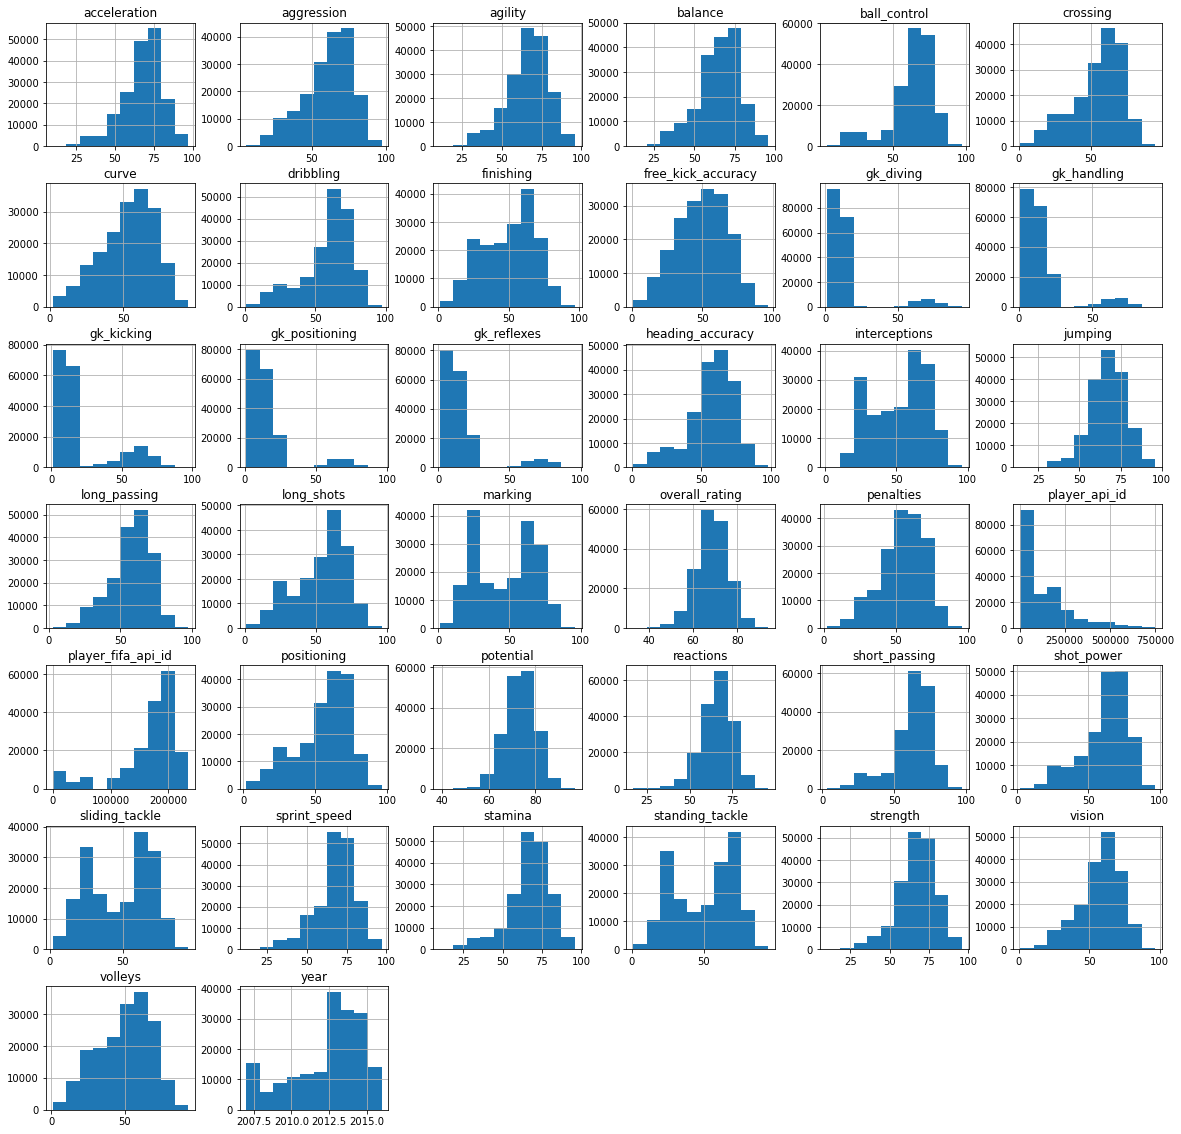

In [275]:
#histogram of player_df table
player_df.hist(figsize=(20,20));

In [277]:
#remove null values from agility, balance, curve, jumping, vision, sliding tackle, standing tackle, strength, volleys
#to compare and see if there's any visible difference
player_df.dropna(subset=['agility','balance','curve','jumping','vision','sliding_tackle','standing_tackle','strength',
                         'volleys'], inplace=True)

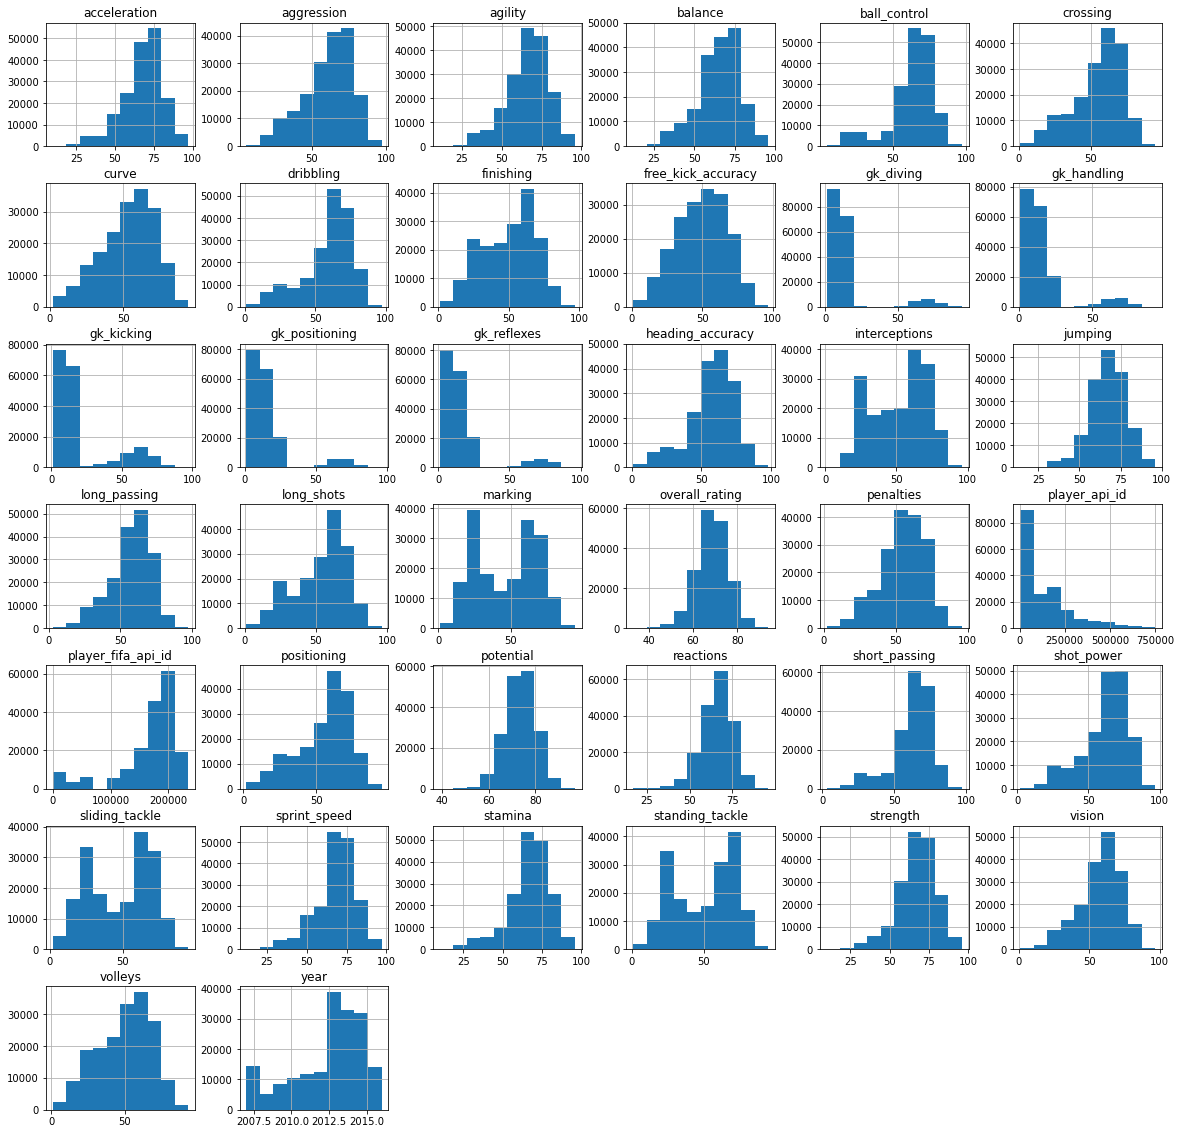

In [279]:
player_df.hist(figsize=(20,20));

In [294]:
y = player_df.attacking_work_rate.value_counts() #count gives overall count
y

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

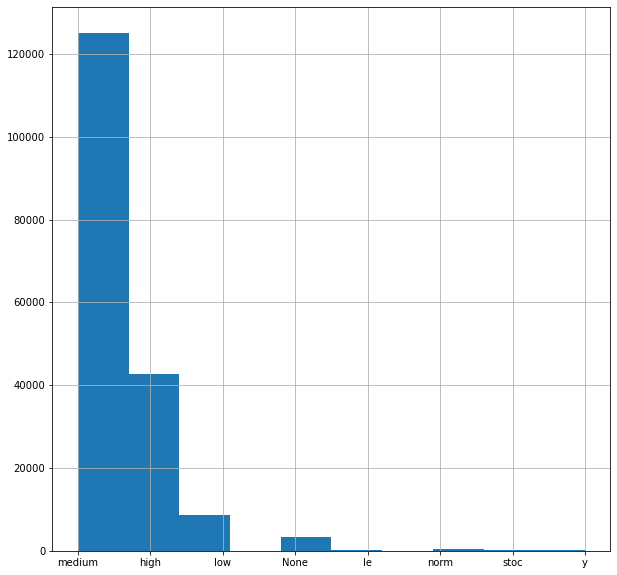

In [296]:
player_df.attacking_work_rate.hist(figsize = (10,10));

In [298]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181265 entries, 0 to 183928
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   player_name          181265 non-null  object        
 1   player_fifa_api_id   181265 non-null  int64         
 2   player_api_id        181265 non-null  int64         
 3   date                 181265 non-null  datetime64[ns]
 4   overall_rating       181265 non-null  float64       
 5   potential            181265 non-null  float64       
 6   preferred_foot       181265 non-null  object        
 7   attacking_work_rate  180354 non-null  object        
 8   defensive_work_rate  181265 non-null  object        
 9   crossing             181265 non-null  float64       
 10  finishing            181265 non-null  float64       
 11  heading_accuracy     181265 non-null  float64       
 12  short_passing        181265 non-null  float64       
 13  volleys       

In [299]:
player_df.drop(columns=['attacking_work_rate', 'defensive_work_rate'], inplace=True)

In [300]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181265 entries, 0 to 183928
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   player_name         181265 non-null  object        
 1   player_fifa_api_id  181265 non-null  int64         
 2   player_api_id       181265 non-null  int64         
 3   date                181265 non-null  datetime64[ns]
 4   overall_rating      181265 non-null  float64       
 5   potential           181265 non-null  float64       
 6   preferred_foot      181265 non-null  object        
 7   crossing            181265 non-null  float64       
 8   finishing           181265 non-null  float64       
 9   heading_accuracy    181265 non-null  float64       
 10  short_passing       181265 non-null  float64       
 11  volleys             181265 non-null  float64       
 12  dribbling           181265 non-null  float64       
 13  curve               181265 no

# Exploratory Data Analysis to answer the initial questions

Players that received most penalties

Text(0.5, 0, 'Number of Penalties')

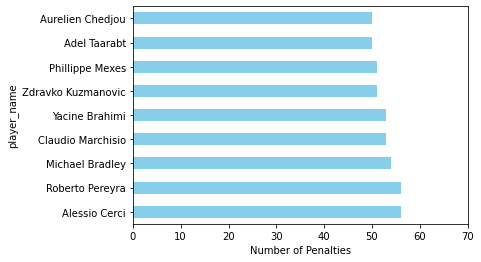

In [378]:
#players that received most penalities
penalties_count_df = player_df.groupby(['player_api_id','player_name']).penalties.count().reset_index()

penalties_count_df.drop(['player_api_id'],axis=1,inplace = True)
penalties_count_df.rename(columns={'penalties' : 'penalty_count'}, inplace=True)
penalties_count_df.set_index('player_name',inplace = True)

pn = penalties_count_df[
penalties_count_df['penalty_count'] > 
penalties_count_df.penalty_count.quantile(.999)].sort_values('penalty_count',ascending = False).plot(kind = 'barh',xlim=(0,70),legend = False, color='skyBlue')
    
pn.set_xlabel("Number of Penalties")




In [334]:
player_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [335]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [412]:
#deriving atrributes of players by joining the player and player_attributes table

stat = pd.read_sql("""select b.player_name,
                             b.player_api_id,
                             b.birthday,
                             a.id, 
                             a.date,
                             a.acceleration, 
                             a.stamina, 
                             a.sprint_speed, 
                             a.agility, 
                             a.balance,
                             a.reactions,
                             a.preferred_foot
                             from player b
                             join player_attributes a
                             on
                             b.player_api_id = a.player_api_id""",conn)
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_name     183978 non-null  object 
 1   player_api_id   183978 non-null  int64  
 2   birthday        183978 non-null  object 
 3   id              183978 non-null  int64  
 4   date            183978 non-null  object 
 5   acceleration    183142 non-null  float64
 6   stamina         183142 non-null  float64
 7   sprint_speed    183142 non-null  float64
 8   agility         181265 non-null  float64
 9   balance         181265 non-null  float64
 10  reactions       183142 non-null  float64
 11  preferred_foot  183142 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 16.8+ MB


In [413]:
stat.head(10)

,player_name,player_api_id,birthday,id,date,acceleration,stamina,sprint_speed,agility,balance,reactions,preferred_foot
0,Aaron Appindangoye,505942,1992-02-29 00:00:00,1,2016-02-18 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
1,Aaron Appindangoye,505942,1992-02-29 00:00:00,2,2015-11-19 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
2,Aaron Appindangoye,505942,1992-02-29 00:00:00,3,2015-09-21 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
3,Aaron Appindangoye,505942,1992-02-29 00:00:00,4,2015-03-20 00:00:00,60.0,54.0,64.0,59.0,65.0,46.0,right
4,Aaron Appindangoye,505942,1992-02-29 00:00:00,5,2007-02-22 00:00:00,60.0,54.0,64.0,59.0,65.0,46.0,right
5,Aaron Cresswell,155782,1989-12-15 00:00:00,6,2016-04-21 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
6,Aaron Cresswell,155782,1989-12-15 00:00:00,7,2016-04-07 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
7,Aaron Cresswell,155782,1989-12-15 00:00:00,8,2016-01-07 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
8,Aaron Cresswell,155782,1989-12-15 00:00:00,9,2015-12-24 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
9,Aaron Cresswell,155782,1989-12-15 00:00:00,10,2015-12-17 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left


In [414]:
del stat['id']

In [415]:
stat.head(10)

,player_name,player_api_id,birthday,date,acceleration,stamina,sprint_speed,agility,balance,reactions,preferred_foot
0,Aaron Appindangoye,505942,1992-02-29 00:00:00,2016-02-18 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
1,Aaron Appindangoye,505942,1992-02-29 00:00:00,2015-11-19 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
2,Aaron Appindangoye,505942,1992-02-29 00:00:00,2015-09-21 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
3,Aaron Appindangoye,505942,1992-02-29 00:00:00,2015-03-20 00:00:00,60.0,54.0,64.0,59.0,65.0,46.0,right
4,Aaron Appindangoye,505942,1992-02-29 00:00:00,2007-02-22 00:00:00,60.0,54.0,64.0,59.0,65.0,46.0,right
5,Aaron Cresswell,155782,1989-12-15 00:00:00,2016-04-21 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
6,Aaron Cresswell,155782,1989-12-15 00:00:00,2016-04-07 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
7,Aaron Cresswell,155782,1989-12-15 00:00:00,2016-01-07 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
8,Aaron Cresswell,155782,1989-12-15 00:00:00,2015-12-24 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
9,Aaron Cresswell,155782,1989-12-15 00:00:00,2015-12-17 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left


In [416]:
#converting birthday and date datatype
stat['date'] = pd.to_datetime(stat['date'])
stat['birthday'] = pd.to_datetime(stat['birthday'])
stat.to_sql("status",conn,if_exists="replace")
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_name     183978 non-null  object        
 1   player_api_id   183978 non-null  int64         
 2   birthday        183978 non-null  datetime64[ns]
 3   date            183978 non-null  datetime64[ns]
 4   acceleration    183142 non-null  float64       
 5   stamina         183142 non-null  float64       
 6   sprint_speed    183142 non-null  float64       
 7   agility         181265 non-null  float64       
 8   balance         181265 non-null  float64       
 9   reactions       183142 non-null  float64       
 10  preferred_foot  183142 non-null  object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 15.4+ MB


In [417]:
stat.head(5)

,player_name,player_api_id,birthday,date,acceleration,stamina,sprint_speed,agility,balance,reactions,preferred_foot
0,Aaron Appindangoye,505942,1992-02-29,2016-02-18,60.0,54.0,64.0,59.0,65.0,47.0,right
1,Aaron Appindangoye,505942,1992-02-29,2015-11-19,60.0,54.0,64.0,59.0,65.0,47.0,right
2,Aaron Appindangoye,505942,1992-02-29,2015-09-21,60.0,54.0,64.0,59.0,65.0,47.0,right
3,Aaron Appindangoye,505942,1992-02-29,2015-03-20,60.0,54.0,64.0,59.0,65.0,46.0,right
4,Aaron Appindangoye,505942,1992-02-29,2007-02-22,60.0,54.0,64.0,59.0,65.0,46.0,right


In [418]:
stat.drop_duplicates('player_api_id',keep ="first",inplace= True)

In [419]:
stat.dropna(inplace=True)

In [420]:
stat.head(5)

,player_name,player_api_id,birthday,date,acceleration,stamina,sprint_speed,agility,balance,reactions,preferred_foot
0,Aaron Appindangoye,505942,1992-02-29,2016-02-18,60.0,54.0,64.0,59.0,65.0,47.0,right
5,Aaron Cresswell,155782,1989-12-15,2016-04-21,79.0,79.0,78.0,78.0,90.0,67.0,left
38,Aaron Doran,162549,1991-05-13,2016-01-07,77.0,66.0,74.0,85.0,92.0,51.0,right
64,Aaron Galindo,30572,1982-05-08,2016-04-21,33.0,49.0,34.0,62.0,41.0,57.0,right
87,Aaron Hughes,23780,1979-11-08,2015-12-24,33.0,60.0,31.0,41.0,52.0,68.0,right


In [421]:
stat.to_sql("status",conn,if_exists="replace")

In [422]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10582 entries, 0 to 183968
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   player_name     10582 non-null  object        
 1   player_api_id   10582 non-null  int64         
 2   birthday        10582 non-null  datetime64[ns]
 3   date            10582 non-null  datetime64[ns]
 4   acceleration    10582 non-null  float64       
 5   stamina         10582 non-null  float64       
 6   sprint_speed    10582 non-null  float64       
 7   agility         10582 non-null  float64       
 8   balance         10582 non-null  float64       
 9   reactions       10582 non-null  float64       
 10  preferred_foot  10582 non-null  object        
dtypes: datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 992.1+ KB


In [423]:
def p_age(x,y):
    return(int((y-x).days / 365))

q = pd.read_sql("select * from status",conn)
q

,index,player_name,player_api_id,birthday,date,acceleration,stamina,sprint_speed,agility,balance,reactions,preferred_foot
0,0,Aaron Appindangoye,505942,1992-02-29 00:00:00,2016-02-18 00:00:00,60.0,54.0,64.0,59.0,65.0,47.0,right
1,5,Aaron Cresswell,155782,1989-12-15 00:00:00,2016-04-21 00:00:00,79.0,79.0,78.0,78.0,90.0,67.0,left
2,38,Aaron Doran,162549,1991-05-13 00:00:00,2016-01-07 00:00:00,77.0,66.0,74.0,85.0,92.0,51.0,right
3,64,Aaron Galindo,30572,1982-05-08 00:00:00,2016-04-21 00:00:00,33.0,49.0,34.0,62.0,41.0,57.0,right
4,87,Aaron Hughes,23780,1979-11-08 00:00:00,2015-12-24 00:00:00,33.0,60.0,31.0,41.0,52.0,68.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...
10577,183924,Zoumana Camara,26357,1979-04-03 00:00:00,2015-03-06 00:00:00,53.0,54.0,63.0,62.0,62.0,68.0,right
10578,183937,Zsolt Laczko,111182,1986-12-18 00:00:00,2014-09-18 00:00:00,69.0,77.0,68.0,62.0,58.0,65.0,left
10579,183953,Zsolt Low,36491,1979-04-29 00:00:00,2011-02-22 00:00:00,71.0,70.0,73.0,59.0,72.0,69.0,left
10580,183960,Zurab Khizanishvili,35506,1981-10-06 00:00:00,2011-02-22 00:00:00,66.0,68.0,66.0,56.0,53.0,62.0,right


In [424]:
q['date'] = pd.to_datetime(q['date'])
q['birthday'] = pd.to_datetime(q['birthday'])
q['age'] = q.apply(lambda a: p_age(a['birthday'],a['date']),axis=1)
q.to_sql("status",conn,if_exists="replace")


In [425]:
import seaborn as sns
q1 = pd.read_sql("""select age as Age,
                           avg(reactions) as avg_reactions,
                           avg(stamina) as avg_stamina,
                           avg(acceleration) as avg_acceleration,
                           avg(balance) as avg_balance,
                           avg(sprint_speed) as avg_sprint_speed,
                           avg(agility) as avg_agility
                           from status
                           group by 1
                           order by 1""",conn)
q1

,Age,avg_reactions,avg_stamina,avg_acceleration,avg_balance,avg_sprint_speed,avg_agility
0,17,56.200000,55.600000,64.000000,55.866667,64.066667,59.000000
1,18,54.887640,57.325843,68.988764,67.168539,68.617978,64.337079
2,19,58.437751,60.927711,68.939759,66.698795,68.947791,66.594378
3,20,59.111650,62.094660,69.395631,66.526699,69.172330,65.080097
4,21,61.956522,64.242236,69.933747,65.902692,70.084886,66.881988
5,22,62.706954,64.771523,68.675497,65.162252,69.172185,66.024834
6,23,64.663551,65.848910,69.422118,65.353583,69.570093,66.875389
7,24,64.992775,67.752890,69.426301,65.102601,69.660405,67.143064
8,25,65.586060,68.065434,69.630156,65.381223,69.816501,67.689900
9,26,66.722876,68.392157,68.650980,63.894118,69.300654,66.275817


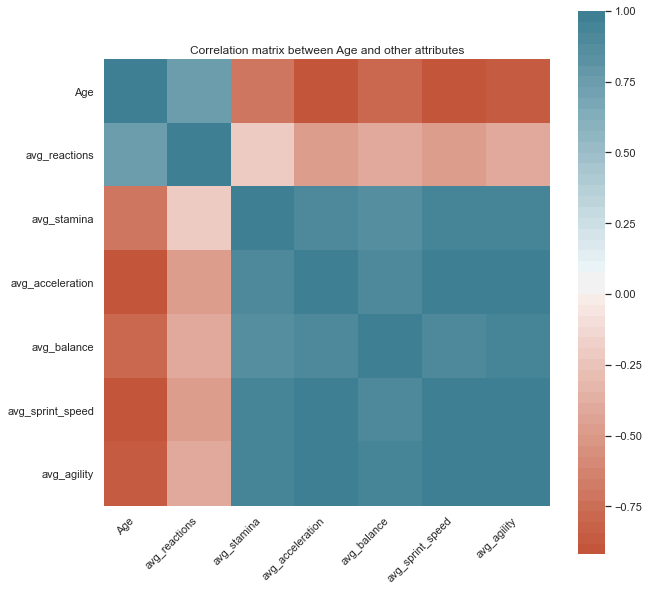

In [453]:
correlation = q1.corr()
axis = sns.heatmap(correlation,
                  xticklabels = correlation.columns.values,
                  yticklabels = correlation.columns.values,
                  cmap=sns.diverging_palette(20, 220, n=50),
                  square = True)
axis.set_title("Correlation matrix between Age and other attributes")
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
sns.set(rc={'figure.figsize':(10,10)})

# How to read the correlation heatmap

Each square represents the correlation between individual variables on each axis. The correlation values ranges from
1 to -1 with 0 being the center. While 1 represents positive correlation, -1 represents negative correlation. Values 
closer to zero means there's no linear trend between variables.